# Predictive Modeling

---

## Prepare the dataset

The next steps in preparing the dataset might involve checking for missing values and handling them appropriately, encoding categorical variables if necessary, and standardizing or normalizing numerical features if required.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sabirinID/British-Airways-Data-Science-Virtual-Internship/main/Files/2-Predicting%20customer%20buying%20behaviour/customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7,
}

df['flight_day'] = df['flight_day'].map(mapping)

In [7]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
# Check for missing values
df.isna().sum().sum()

0

In [10]:
# Check for duplicates
df.duplicated().sum()

719

In [11]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [12]:
# Mapping 'sales_channel'
sales_channel_mapping = {
    'Mobile': 0,
    'Internet': 1
}
df['sales_channel'] = df['sales_channel'].map(sales_channel_mapping)

In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
# Mapping 'trip_type'
trip_type_mapping = {
    'CircleTrip': 0,
    'OneWay': 1,
    'RoundTrip': 3
}
df['trip_type'] = df['trip_type'].map(trip_type_mapping)

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,3,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,3,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,3,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,3,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,3,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [16]:
# Separate numerical and categorical columns
num_df = df.select_dtypes(include=[np.number])
num_cols = num_df.columns

cat_df = df.select_dtypes(include=['object'])
cat_cols = cat_df.columns

# Print numerical and categorical columns
print('Numerical columns  : ', num_cols)
print()
print('Categorical columns: ', cat_cols)

Numerical columns  :  Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete'],
      dtype='object')

Categorical columns:  Index(['route', 'booking_origin'], dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

---

## Train a machine learning model

Split the data into a training set and a test set, then train a machine learning model on the training data. For this task, a RandomForest could be used as it allows us to easily interpret how each variable contributes to the predictive power of the model.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
X = num_df.drop('booking_complete', axis=1)
y = num_df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
print('Number of records in the training set: ', len(X_train))
print('Number of records in the testing set : ', len(X_test))
print('Number of records in the training set: ', len(y_train))
print('Number of records in the testing set : ', len(y_test))

Number of records in the training set:  40000
Number of records in the testing set :  10000
Number of records in the training set:  40000
Number of records in the testing set :  10000


In [20]:
print('Value counts in the training set: ')
print(pd.Series(y_train).value_counts())
print()
print('Value counts in the testing set : ')
print(pd.Series(y_test).value_counts())

Value counts in the training set: 
booking_complete
0    34015
1     5985
Name: count, dtype: int64

Value counts in the testing set : 
booking_complete
0    8507
1    1493
Name: count, dtype: int64


---

## Evaluate the model

Evaluate the performance of the model on the test set. This could involve calculating evaluation metrics like accuracy, precision, recall, or F1 score, and creating a visualization to interpret how each variable contributed to the model.

Accuracy : 0.8472
Precision: 0.40933
Recall   : 0.05291
F1 Score : 0.09371


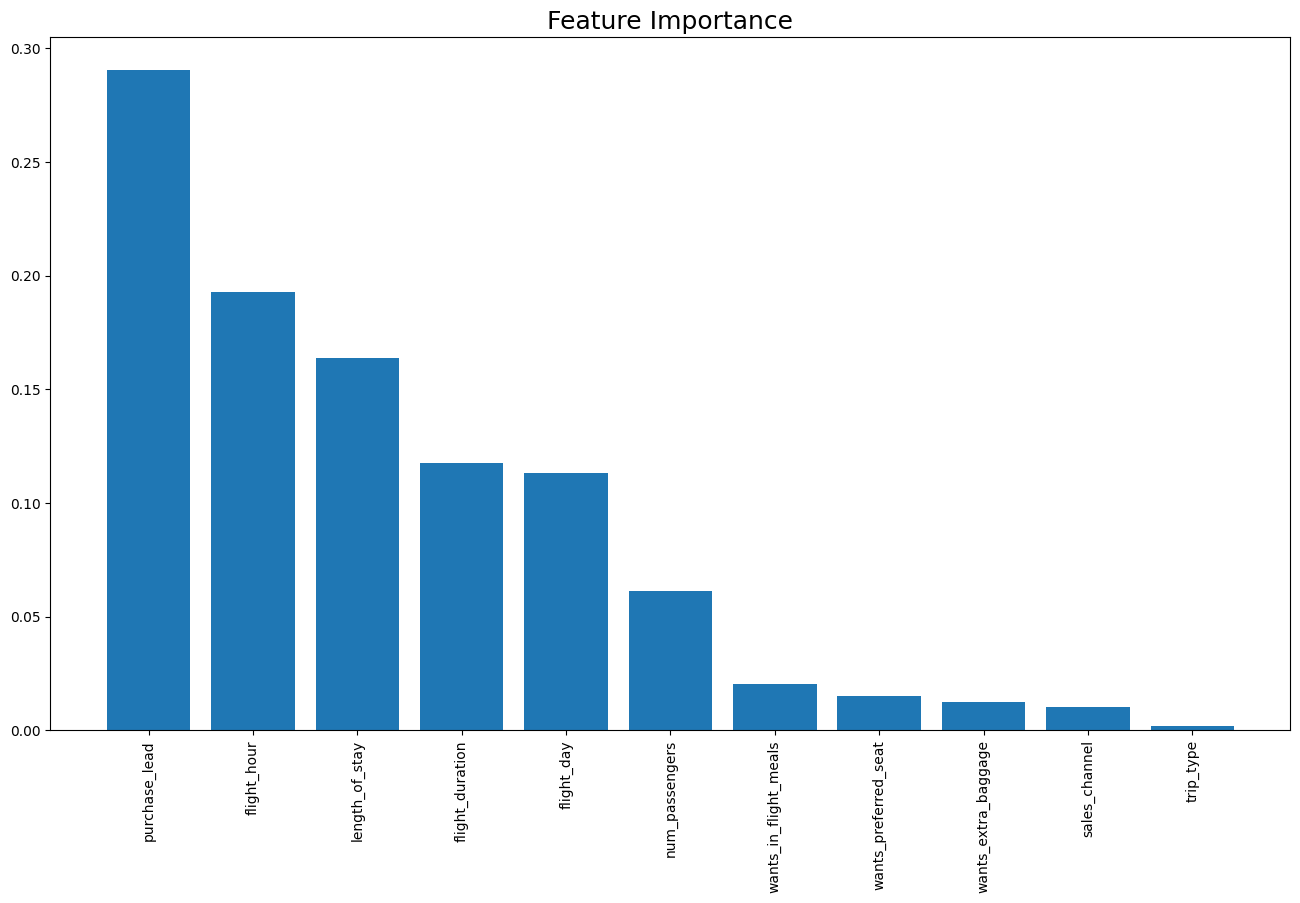

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy : {accuracy.round(5)}')
print(f'Precision: {precision.round(5)}')
print(f'Recall   : {recall.round(5)}')
print(f'F1 Score : {f1.round(5)}')

# Create a visualization of feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 9))
plt.title('Feature Importance', fontsize=18)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()